### **Exemplo Eigenbeef**

---

Gabriel Oukawa <br>
Álgebra linear para ciência de dados <br>
2º Semestre de 2025

---


# 0. Carregar dados de entrada



In [ ]:
import numpy as np
import os
import gdown
import tarfile
import random
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Baixar dados de entrada
os.makedirs('/content/beef', exist_ok=True)

gdown.download(id='12--4AYRmKohssGxlGM7MPGTb5dOqPCWD', quiet=True)

'beef.tar'

# 1. Análise dos dados (figuras exploratórias)
O conjunto utilizado é o: *Meat Freshness Image Dataset*

Link para acesso: https://www.kaggle.com/datasets/vinayakshanawad/meat-freshness-image-dataset

Número total de imagens: 2266

2266


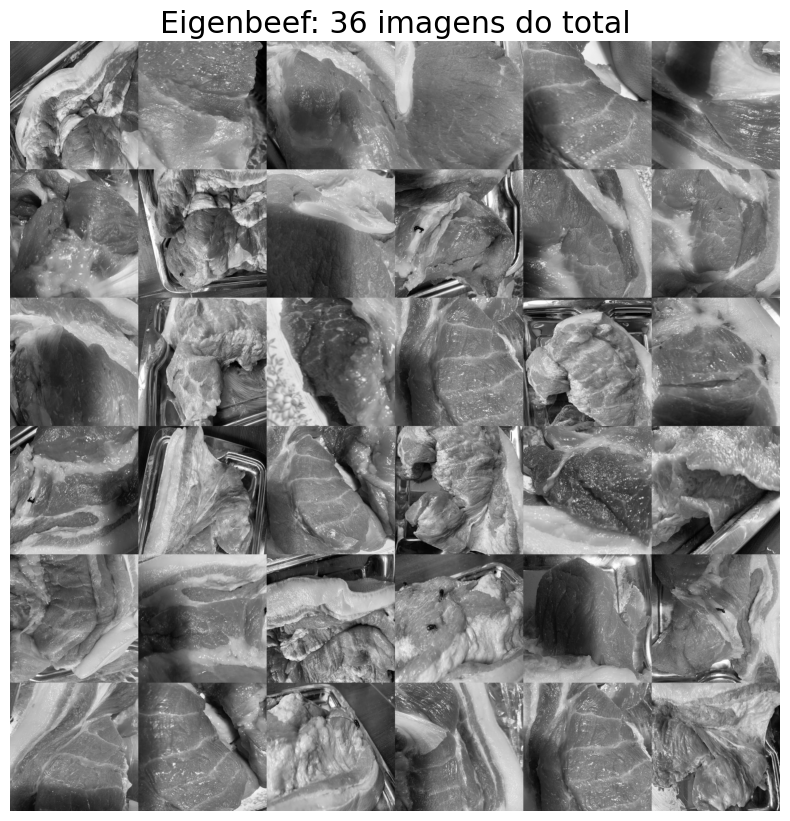

In [32]:
# Escolher 36 imagens (aleatóriamente) e plotar elas
with tarfile.open('beef.tar', 'r:tar') as tar:
    image_members = [m for m in tar.getmembers() if m.name.lower().endswith(('.jpg', '.jpeg'))]
    images = []
    for member in image_members:
        f = tar.extractfile(member)
        img = Image.open(f).convert('L')
        images.append(np.array(img))

print(len(images))

random.shuffle(images)
selected_images = images[:36]

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

m, n = selected_images[0].shape
allBeefs = np.zeros((6*n, 6*m), dtype=np.uint8)

count = 0
for j in range(6):
    for k in range(6):
        allBeefs[j*n:(j+1)*n, k*m:(k+1)*m] = selected_images[count]
        count += 1

plt.imshow(allBeefs, cmap='gray')
plt.axis('off')
plt.title('Eigenbeef: 36 imagens do total')
plt.show()

As imagens são bem parecidas no geral, no entanto, o conjunto possui três classes diferentes: fresca, meio-fresca, e apodrecida.

# 2. Beef médio e reconstruções

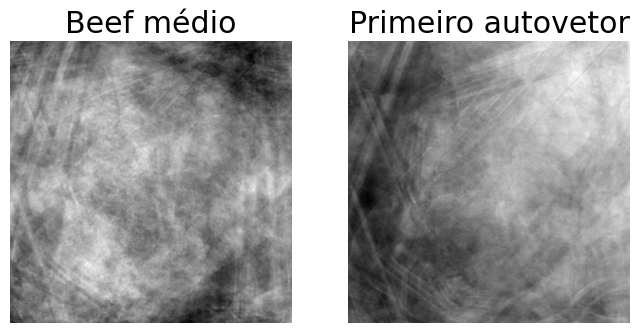

(416, 416)


In [ ]:
# Agora calculamos o "beef" (ou imagem) média e o primeiro autovetor usando SVD
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

trainingBeefs = np.column_stack([img.flatten() for img in selected_images])
avgBeef = np.mean(trainingBeefs, axis=1)

X = trainingBeefs - avgBeef[:, None]
U, S, VT = np.linalg.svd(X, full_matrices=0)

fig1 = plt.figure()

ax1 = fig1.add_subplot(121)
ax1.imshow(avgBeef.reshape(m, n).T, cmap='gray')
ax1.axis('off')
ax1.set_title('Beef médio')

ax2 = fig1.add_subplot(122)
ax2.imshow(U[:,0].reshape(m, n).T, cmap='gray')
ax2.axis('off')
ax2.set_title('Primeiro autovetor')

plt.show()

print((avgBeef.reshape(m, n).T).shape)

Diferente do exemplo *Eigenfaces*, o *beef* médio não apresenta semelhança alguma com um corte de carne. Uma possível explicação é de que a maioria das fotos são tiradas com ângulos/posições diferentes.

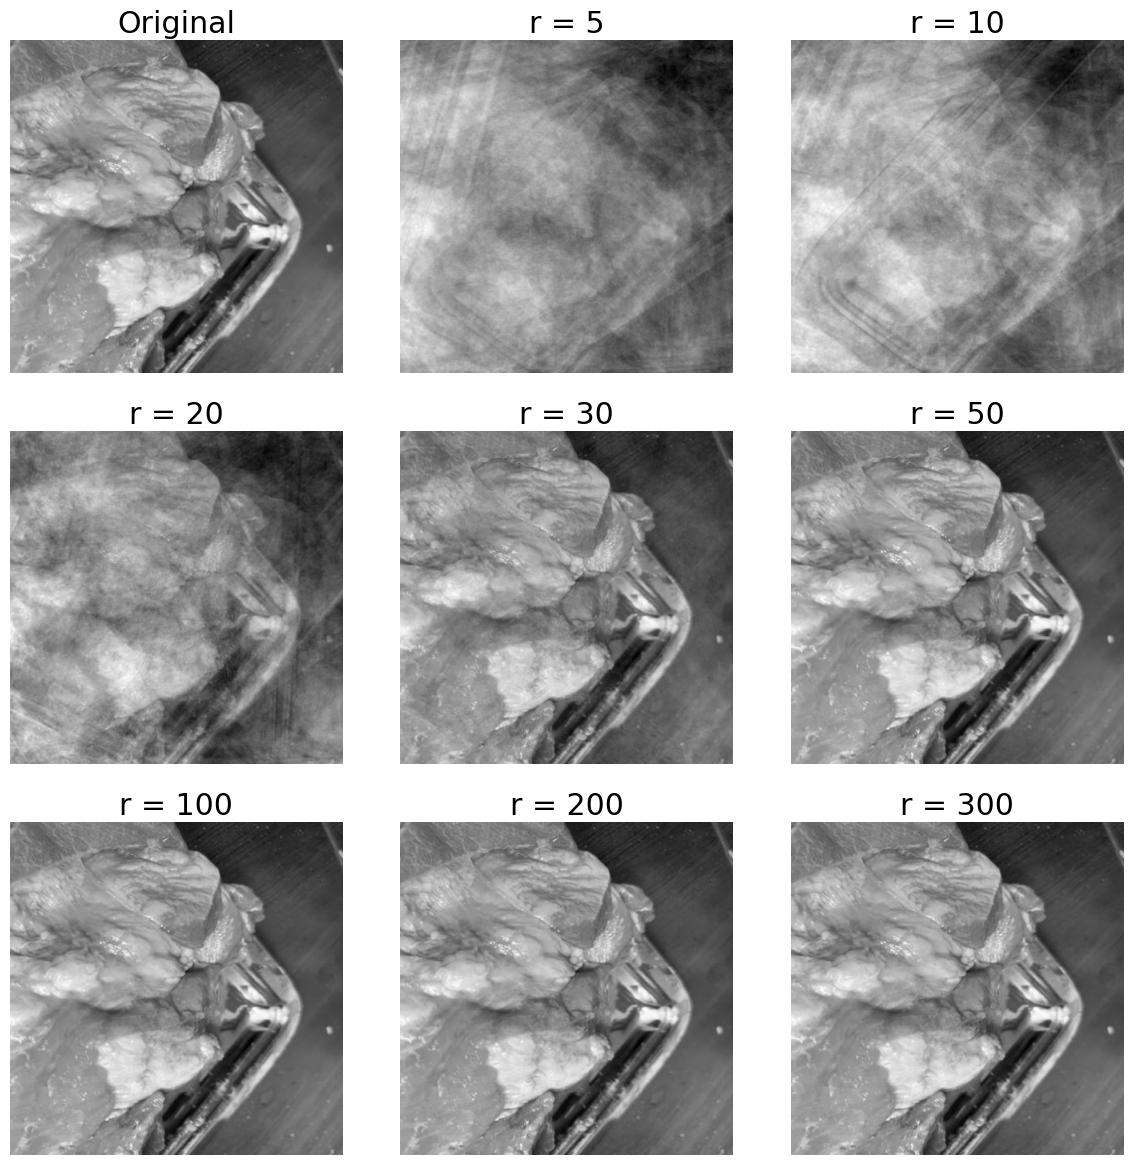

In [ ]:
# Agora reconstruimos um certo "beef" usando SVD variando o posto da matriz (rank)
start_index = 0
if start_index >= trainingBeefs.shape[1]:
    raise ValueError(f"start_index {start_index} exceeds number of beefs {trainingBeefs.shape[1]}")

testBeef = trainingBeefs[:, start_index]
testBeefMS = testBeef - avgBeef

r_list = [0, 5, 10, 20, 30, 50, 100, 200, 300]  # número de ranks

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

for i, r in enumerate(r_list):
    ax = axes[i]
    if r == 0:
        img = testBeef.reshape(m, n).T
        title = 'Original'
    else:
        reconBeef = avgBeef + U[:, :r] @ (U[:, :r].T @ testBeefMS)
        img = reconBeef.reshape(m, n).T
        title = f'r = {r}'

    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

for j in range(len(r_list), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Nota-se que a reconstrução já é boa mesmo com um *rank* relativamente pequeno (r = 30), possívelmente devido ao tamanho da imagem (416 x 146 pixels). A qualidade melhorou um pouco para r = 50, mas acima disso a melhoria é praticamente imperceptível.

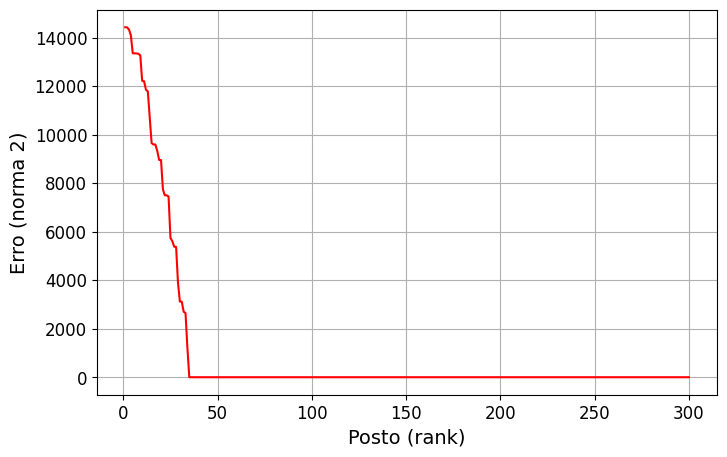

In [ ]:
# Erro usando a norma 2
errors_2 = []
ranks = range(1, 301)

for r in ranks:
    reconBeef = avgBeef + U[:, :r] @ (U[:, :r].T @ testBeefMS)
    diff = testBeef - reconBeef
    errors_2.append(np.linalg.norm(diff, 2))

plt.figure(figsize=(8,5))
plt.plot(ranks, errors_2, '-r')
plt.xlabel('Posto (rank)', fontsize=14)
plt.ylabel('Erro (norma 2)', fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.grid(True)
plt.show()

Ao analisar os erros de reconstrução, nota-se que o erro segundo a Norma 2 é basicamente zero para r > 40.